In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import copy
import pickle
import pandas as pd


def load_data():
    # 加载数据
    data = loadmat("data/mnist_all.mat")

    # print(data.keys())

    train_data = pd.DataFrame()
    test_data = pd.DataFrame()

    for i in range(10):
        temp_df = pd.DataFrame(data["train" + str(i)])
        temp_df['label'] = i
        train_data = train_data.append(temp_df)
        temp_df = pd.DataFrame(data["test" + str(i)])
        temp_df['label'] = i
        test_data = test_data.append(temp_df)

    train_data = shuffle(train_data)
    test_data = shuffle(test_data)

    train_labels = np.array(train_data['label'])
    test_labels = np.array(test_data['label'])


    train_data = train_data.drop('label', axis=1)
    test_data = test_data.drop('label', axis=1)

    train_data = np.array(train_data) / 255
    test_data = np.array(test_data) / 255

    return train_data, test_data, train_labels, test_labels

X_train, X_test, y_train, y_test = load_data()

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=0)

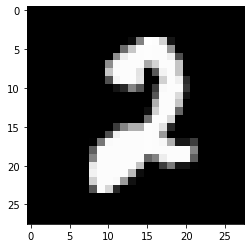

In [8]:
plt.imshow(X_train[5].reshape(1, 28, 28).reshape(28, 28), cmap='gray')
plt.show()